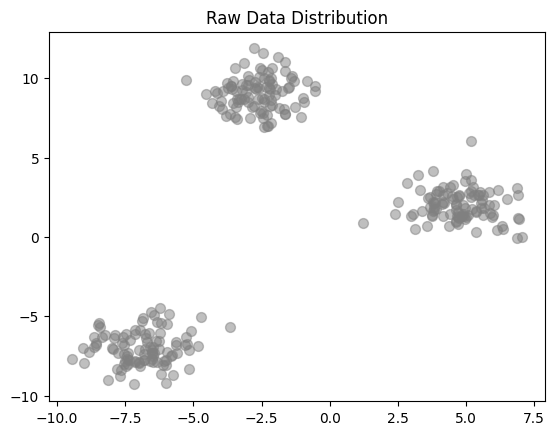

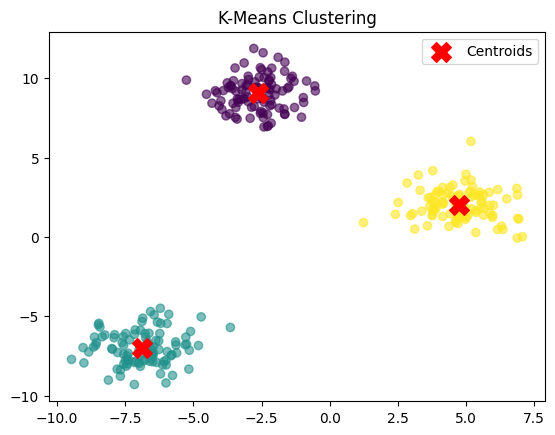

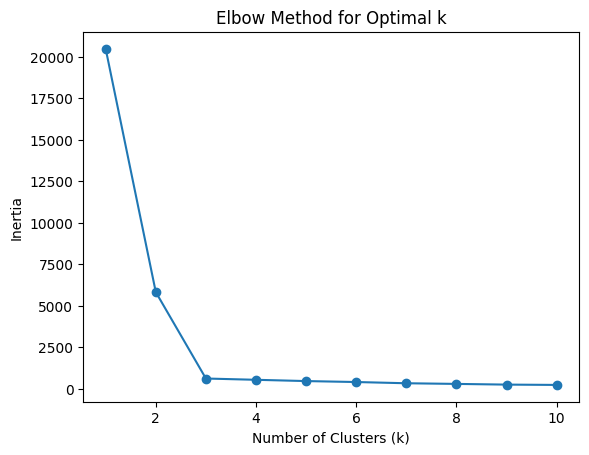

Silhouette Score: 0.841


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 1. Generate Synthetic Data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.05, random_state=42)

# Visualize raw data
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.5)
plt.title("Raw Data Distribution")
plt.show()

# 2. Apply K-Means Clustering
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

# 3. Determine Optimal Clusters (Elbow Method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# 4. Evaluate Clustering (Silhouette Score)
sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score:.3f}")